In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
#accidents_df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')
accidents_df = pd.read_csv('archive/US_Accidents_Dec21_updated.csv')
                                   

In [36]:
accidents_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Hour,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2,2016,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2,2016,5,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2,2016,6,0


In [37]:
accidents_df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Hour,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2,2016,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2,2016,5,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2,2016,6,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,Night,Night,Day,Day,2,2016,6,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,Day,Day,Day,Day,2,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,Day,Day,Day,Day,8,2019,18,4
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,Day,Day,Day,Day,8,2019,19,4
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,Day,Day,Day,Day,8,2019,19,4
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,Day,Day,Day,Day,8,2019,19,4


## Let's explore StartTime

In [38]:
accidents_df.Start_Time


0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [29]:
accidents_df.Start_Time= pd.to_datetime(accidents_df.Start_Time)
accidents_df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [39]:
accidents_df.Start_Time[0]


Timestamp('2016-02-08 00:37:08')

In [40]:
accidents_df.Start_Time[1000:1024]


1000   2016-03-23 07:37:43
1001   2016-03-23 08:10:59
1002   2016-03-23 08:52:43
1003   2016-03-23 09:29:47
1004   2016-03-23 09:45:24
1005   2016-03-23 10:04:59
1006   2016-03-23 10:28:46
1007   2016-03-23 10:46:26
1008   2016-03-23 11:03:21
1009   2016-03-23 11:30:44
1010   2016-03-23 11:46:33
1011   2016-03-23 12:54:53
1012   2016-03-23 13:05:12
1013   2016-03-23 12:58:52
1014   2016-03-23 13:05:12
1015   2016-03-23 13:59:25
1016   2016-03-23 14:24:44
1017   2016-03-23 14:38:04
1018   2016-03-23 15:05:44
1019   2016-03-23 15:12:04
1020   2016-03-23 15:25:15
1021   2016-03-23 15:40:27
1022   2016-03-23 16:01:22
1023   2016-03-23 16:02:45
Name: Start_Time, dtype: datetime64[ns]

In [33]:
accidents_df['Start_Time']


0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [41]:
accidents_df['Month'] = accidents_df['Start_Time'].dt.month
accidents_df['Year'] = accidents_df['Start_Time'].dt.year
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
accidents_df['Weekday'] = accidents_df['Start_Time'].dt.weekday

#yearly data subset 
data_2016 = accidents_df[accidents_df.Start_Time.dt.year == 2016]
data_2017 = accidents_df[accidents_df.Start_Time.dt.year == 2017]
data_2018 = accidents_df[accidents_df.Start_Time.dt.year == 2018]
data_2019 = accidents_df[accidents_df.Start_Time.dt.year == 2019]
data_2020 = accidents_df[accidents_df.Start_Time.dt.year == 2020]
data_2021 = accidents_df[accidents_df.Start_Time.dt.year == 2021]
data_2017_2019 = accidents_df[(accidents_df["Year"] >= 2017) & (accidents_df["Year"] <= 2019)]

## Hour

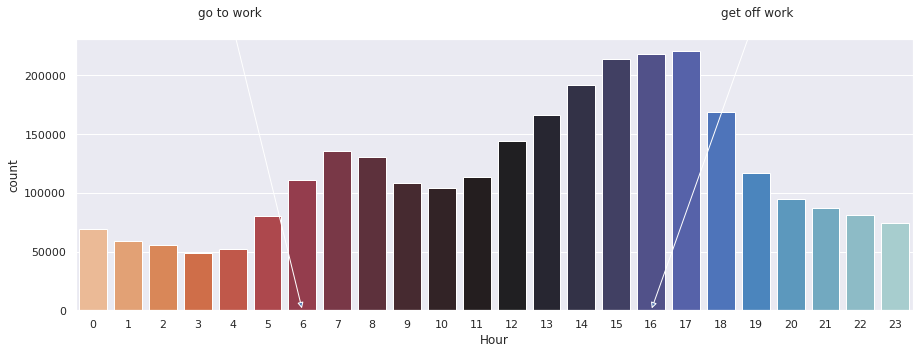

In [42]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(x="Hour", data= accidents_df, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

In [43]:
accidents_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Hour,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2,2016,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2,2016,5,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2,2016,6,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,Night,Night,Day,Day,2,2016,6,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,Day,Day,Day,Day,2,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,Day,Day,Day,Day,8,2019,18,4
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,Day,Day,Day,Day,8,2019,19,4
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,Day,Day,Day,Day,8,2019,19,4
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,Day,Day,Day,Day,8,2019,19,4


## Weekday

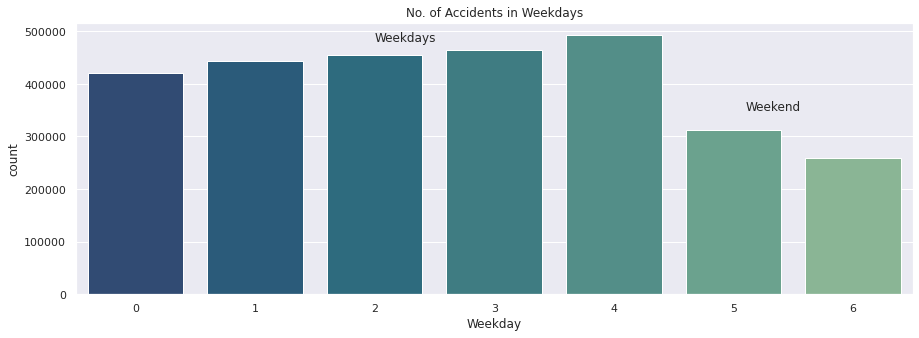

In [44]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Weekday", data=accidents_df, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,480000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,350000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

## All weeks of the year 2017 to 2019

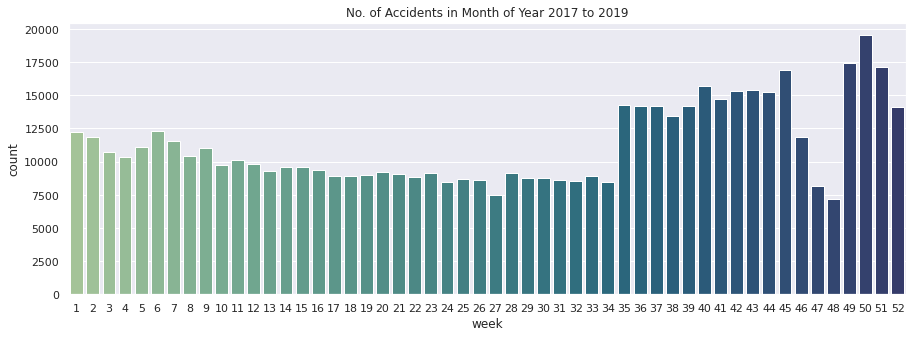

In [19]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2017_2019.Start_Time.dt.isocalendar().week, data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()

## All weeks of the year 2016

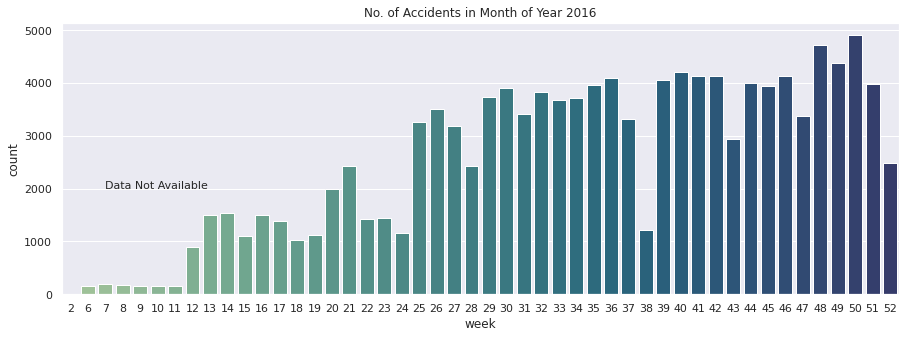

In [45]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(2,2000), fontsize=11)
c.set_title("No. of Accidents in Month of Year 2016")
plt.show()

null

## All weeks of the year 2020

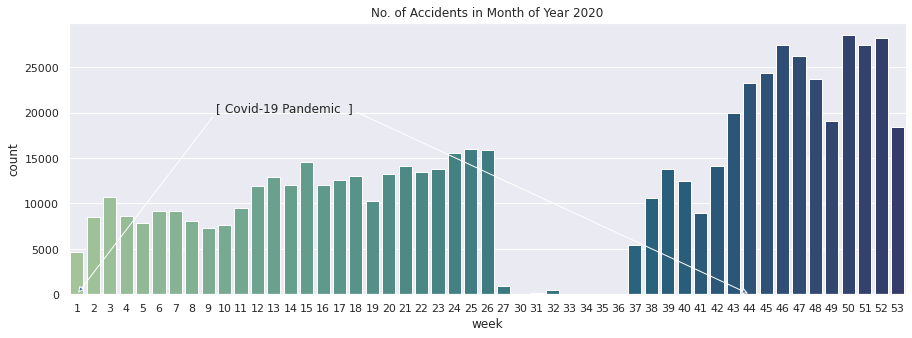

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2020.Start_Time.dt.isocalendar().week, data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(9,20000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(8.5,20000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(41,0),xytext=(16.5,20000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

## All weeks of the year 2021

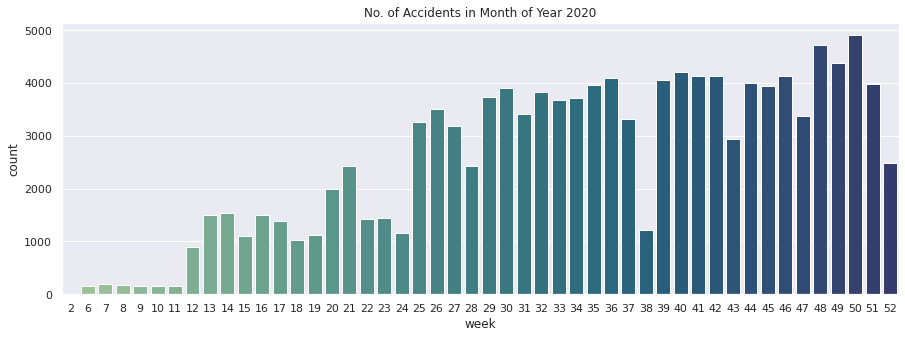

In [22]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

## Monthly

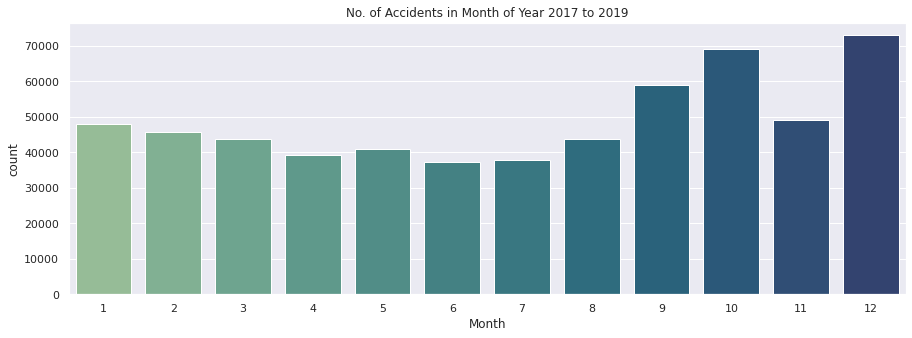

In [46]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Month", data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()

In [47]:
data_2016

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Hour,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2,2016,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2,2016,5,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2,2016,6,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,Night,Night,Day,Day,2,2016,6,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,Day,Day,Day,Day,2,2016,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137506,A-137507,4,2016-01-14 20:18:33,2017-01-30 13:55:44,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to a...,...,False,False,Night,Night,Night,Night,1,2016,20,3
150136,A-150137,4,2016-01-14 20:18:33,2017-02-17 23:22:00,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to a...,...,False,False,Night,Night,Night,Night,1,2016,20,3
150281,A-150282,4,2016-01-14 20:18:33,2017-02-19 00:38:00,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to a...,...,False,False,Night,Night,Night,Night,1,2016,20,3
158327,A-158328,4,2016-01-14 20:18:33,2017-03-17 22:49:03,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to a...,...,False,False,Night,Night,Night,Night,1,2016,20,3


## For the year 2016

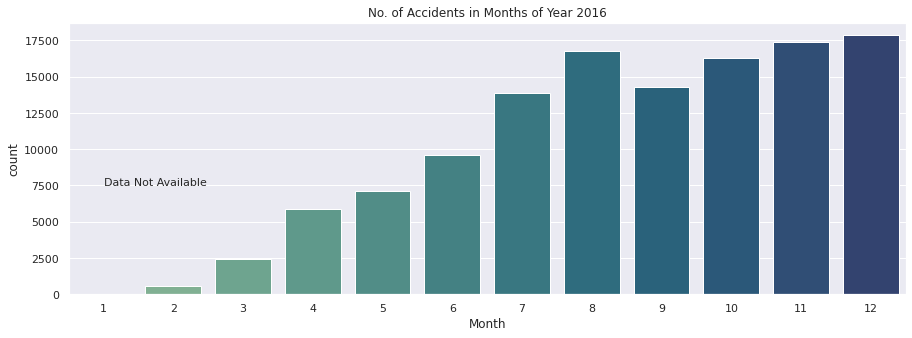

In [48]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(0,7500), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

## For the year 2020

### Covid Period

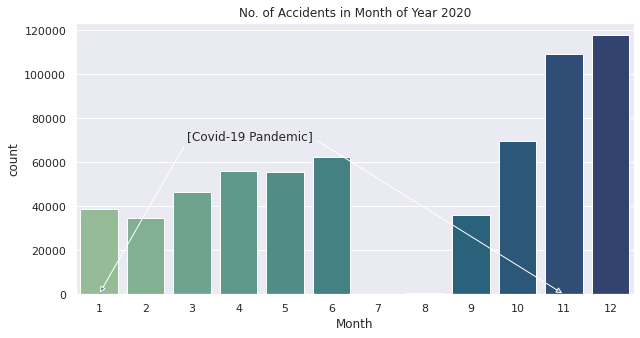

In [49]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(2,70000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,70000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(4.5,70000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

## For the year 2021

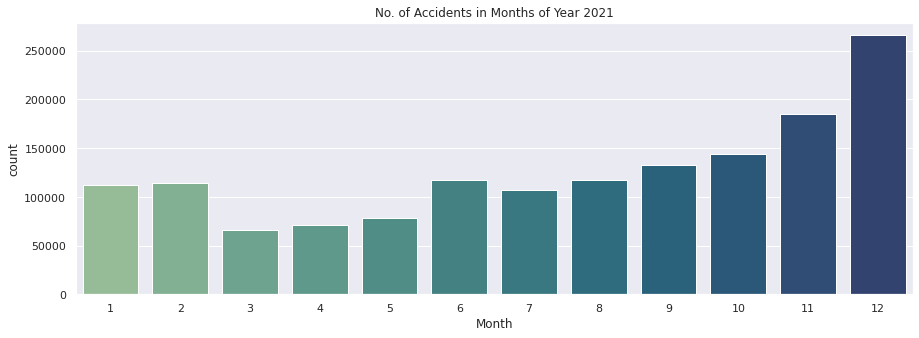

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Month", data=data_2021, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Months of Year 2021")
plt.show();

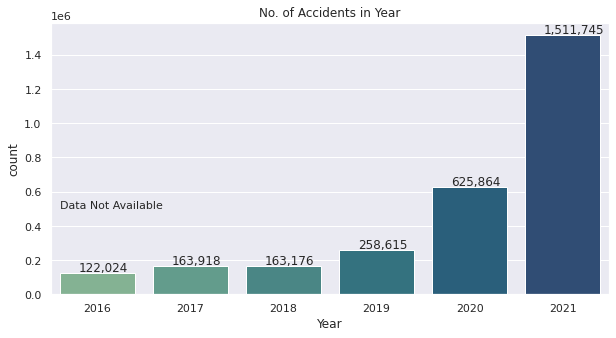

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=accidents_df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()